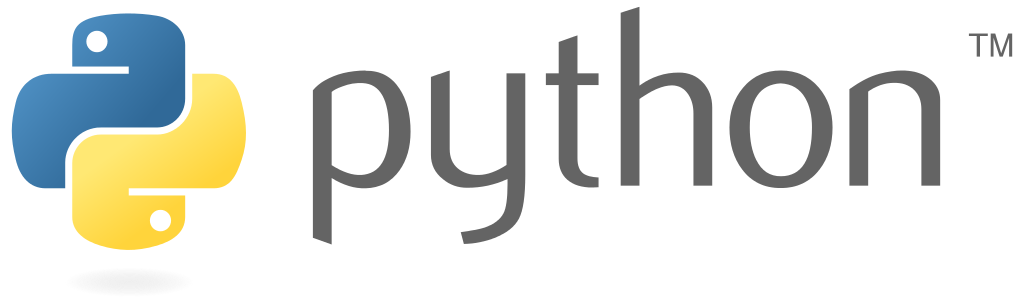

In [1]:
from IPython.display import Image
Image(filename='Python02-basics2_extra/logo.png') 

# Введение в курс "Основы программирования на Python", часть 2

Мы не ждём, что каждый из вас запомнит всё что будет тут показано, но каждый сможет взять эту лекцию позднее и самостоятельно в ней всё найти... а ещё есть гугл

## В прошлый раз мы посмотрели на числа и строки, а сегодня разберем списки, кортежи(туплы), наборы(сеты), словари, а так же функции и импорты

Начнем с кортежей и списков. Людям с опытом программирования на других языках может сразу показаться непонятным и избыточным две такие схожие структуры, ну типа "массив он и есть массив, зачем плодить сущности?" Поэтому разберемся поподробнее чтобы понять чем это удобно

## Кортеж (tuple)

Кортеж - неизменяемая (нельзя вставить или удалить элементы, а также изменить их значения) последовательность данных любого типа

In [2]:
# Канонический способ инициализации
tup1 = (1, 2, 3) 

In [3]:
# Cоздание "на лету"
tup2 = 1, 2, 3 

In [4]:
print (tup1) 
print (tup2) 
print (tup1==tup2)

(1, 2, 3)
(1, 2, 3)
True


In [5]:
# Любые данные
tup3 = (3.14, 2, 'this is a string', None)
print(tup3)

(3.14, 2, 'this is a string', None)


In [6]:
for element in tup3:
    print(type(element))

<class 'float'>
<class 'int'>
<class 'str'>
<class 'NoneType'>


In [7]:
# Распаковка кортежа
a, b, c = tup1 # Распаковка кортежа в скалярные переменные
print(c, b, a)

3 2 1


In [8]:
# Когда нас интересует только часть элементов, 
# то можно остальные заменить на "_"
_, b, _ = tup1
print(b)

2


"_" - это на самом деле тоже переменная, и в целом ею можно пользоваться, но обычно в неё сливают всё ненужное 

In [9]:
print(_)

3


1 5
5 1


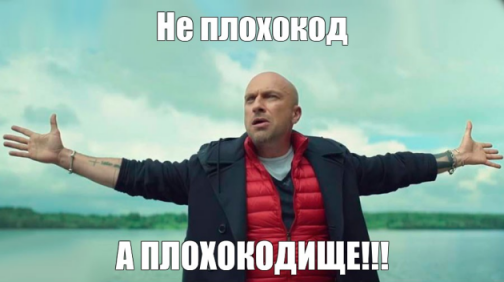

In [93]:
# Великое питонское чудо - поменять переменные местами за 1 операцию
print(a, b)
b, a = a, b 
print(a, b)
# Только пожалуйста, никогда так не делайте 
# и не говорите, что "это в лекциях показали"
Image(filename='Python02-basics2_extra/badcode.png')  

In [11]:
# Длина кортежа
l = len(tup1) 
print(l)

3


In [12]:
# Обращение к конкретному элементу кортежа
f = tup1[1]
print(f)

2


In [13]:
# Изменить ничего нельзя
tup1[1] = 17

TypeError: 'tuple' object does not support item assignment

In [14]:
# Но можно перетереть, и это всегда требует внимания
tup1 = 1, 2, 17
print (tup1)

(1, 2, 17)


## Список (list)

Список - изменяемая последовательность данных любого типа

In [15]:
# Канонический способ инициализации
lis1 = [3.14, 2, 'this is a string', None] 
print (lis1)

[3.14, 2, 'this is a string', None]


In [16]:
# Объединение двух списков
s1 = [1, 2, 3]
s2 = [6, 7, 8]

In [17]:
# Легко и просто... и медленно
s12a = s1 + s2 
print(s12a)

[1, 2, 3, 6, 7, 8]


In [18]:
# Менее очевидно, но быстрее
s12b = s1.copy() # Копируем список
s12b.extend(s2) # Увеличиваем список на второй список
print(s12a)

[1, 2, 3, 6, 7, 8]


In [19]:
print(s12a == s12b)

True


Интересна операция "умножения" списка s на натуральное число n: s * n. Оно преобразуется в сумму n списков s, после чего выполняется их объединение. В итоге получаем список s, повторенный n раз.

In [20]:
s1 = [1, 2, 3]
s2 = s1 * 3
print(s2)

[1, 2, 3, 1, 2, 3, 1, 2, 3]


In [21]:
# Добавление в конец списка
s1 = [23, 12, 31]
s1.append(333) 
print(s1)

[23, 12, 31, 333]


In [22]:
# Извлекаем из списка элемент 
a = s1.pop(2) # Извлекаем из конца списка элемент
print(a)
print(s1)

31
[23, 12, 333]


In [23]:
# Проверяем, есть ли элемент "12" в списке
ins1 = 12 in s1 
print('12 in s1:', ins1)

12 in s1: True


In [24]:
s_sort = sorted(s1) # Сортировка по возрастанию
print(s_sort)

[12, 23, 333]


In [25]:
# Можно также применять in-place сортировку .sort()
s1 = [23, 12, 31]
s1.append(333) 
print(s1)
s1.sort()
print(s1)

[23, 12, 31, 333]
[12, 23, 31, 333]


In [26]:
# Удаляем элемент списка
del s_sort[1] # Удаляем второй элемент
print(s_sort)

[12, 333]


In [27]:
# минимальный/максимальный элемент
print('min element of s1:', min(s1))

min element of s1: 12


In [28]:
# Длина списка
print(len(s1))

4


## Индексация в кортежах и списках




Два различных подхода к индексации:

* Взятие одного элемента списка s по его индексу j (отрицательные индексы означают просмотр списк справа налево): s[j]
* Взятие т.н. "среза" - подпоследовательности, задаваемой начальным индексом (включается), конечным индексом (не включается) и шагом смещения (при отрицательном шаге идем справа налево): s[start:end:step]



In [29]:
s = [1, 2, 3, 4, 5]

In [30]:
a = s[-1] # первый с конца
print(a)

5


In [31]:
w = s[1:3]
print(w)

[2, 3]


In [32]:
w = s[:2] # Можно опускать начальный индекс
print(w)

[1, 2]


In [33]:
w = s[3:] # И конечный
print(w)

[4, 5]


In [34]:
w = s[::2] # И даже оба индекса
print(w)

[1, 3, 5]


In [35]:
w = s[::-1] # пройдёмся в обратном порядке
print(w)

[5, 4, 3, 2, 1]


In [36]:
# Всё то же самое работает и в кортежах!

## А ещё есть набор (set)

Набор - неупорядоченное и непроиндексированное множество данных любого типа. Главное достоинство сета - это супероптимизированный поиск одинаковых элементов.

In [37]:
thisset = {3.14, 2, 'this is a string', None, 2, 2}
print (thisset)

{'this is a string', 2, 3.14, None}


В наборе могут быть только уникальные переменные, все одинаковые перетираются. А еще к ним нельзя обратиться по индексу, но по ним можно итерироваться

In [38]:
for element in thisset:
    print(element, type(element))

this is a string <class 'str'>
2 <class 'int'>
3.14 <class 'float'>
None <class 'NoneType'>


In [39]:
print (2 in thisset) # есть ли элемент в наборе

True


In [40]:
thisset.add('smth new') # что-то добавим
thisset.remove(2) # что-то удалим
print(thisset)

{'this is a string', 3.14, None, 'smth new'}


In [41]:
thisset.remove(2) # удалить того что нет - нельзя

KeyError: 2

In [42]:
# но можно сделать так (удалить, если есть)
thisset.discard(2) 
print(thisset)
thisset.discard(3.14) 
print(thisset)

{'this is a string', 3.14, None, 'smth new'}
{'this is a string', None, 'smth new'}


## Преобразование кортеж - список - набор и обратно

In [43]:
lis = [2, 3.14, None, 'this is a string']
tup = tuple(lis)
s = set(tup)
new_lis = list(s)

print (lis) 
print(tup)
print(s)
print(new_lis)
print(lis == new_lis) 

[2, 3.14, None, 'this is a string']
(2, 3.14, None, 'this is a string')
{'this is a string', 2, 3.14, None}
['this is a string', 2, 3.14, None]
False


In [44]:
# В сете могут произойти потери или перестановки!!!
lis = [3.14, 2, 'this is a string', None, 2, 2] # сменим порядок или добавим одинаковых
tup = tuple(lis)
s = set(tup)
new_lis = list(s)

print (lis) 
print(tup)
print(s)
print(new_lis)
print(lis == new_lis) 

[3.14, 2, 'this is a string', None, 2, 2]
(3.14, 2, 'this is a string', None, 2, 2)
{'this is a string', 2, 3.14, None}
['this is a string', 2, 3.14, None]
False


## И всё же, чем же кортеж лучше списка?

Вы могли заметить, что список умеет всё то же самое что кортеж, и даже больше. Смысл использования кортежа как раз и заключается в том, что он прост и туп, и работать с ним быстрее. 

In [45]:
timeit((3.14, 2, 'this is a string', None)) 

5.31 ns ± 0.0143 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [46]:
timeit([3.14, 2, 'this is a string', None])

33.4 ns ± 1.45 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [47]:
timeit({3.14, 2, 'this is a string', None})

74.5 ns ± 2.62 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Словари, или хэши (dictionary)

Словарь – это специальная структура данных, в которой доступ к элементу осуществляется по ключу, который может быть любым неизменяемым типом данных

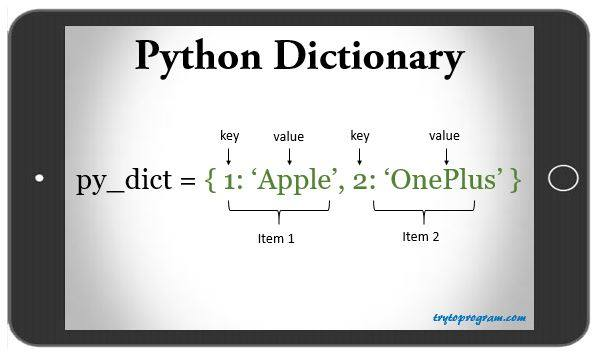

In [48]:
Image(filename='Python02-basics2_extra/python_dictionary.jpg')  

In [49]:
# Создание словаря, обычный метод
h1 = {'age' : 5, 'amount' : 'unknown', 11 : [32, 33, 34]} 
print(h1)

{'age': 5, 'amount': 'unknown', 11: [32, 33, 34]}


In [50]:
# Создание словаря, с помощью отдельных списков ключей и значений
key_list = ['age', 'amount', 11]
value_list = [5, 'unknown', [32, 33, 34]]
h2 = dict(zip(key_list, value_list)) 

In [51]:
print(h1 == h2)

True


In [52]:
h2['amount'] = 'new_value' # Доступ по ключу
print(h2)

{'age': 5, 'amount': 'new_value', 11: [32, 33, 34]}


In [53]:
h2_keys = list(h2.keys()) # Список ключей словаря
h2_values = list(h2.values()) # Список значений словаря
print('Keys:', h2_keys, 'Values:', h2_values)

Keys: ['age', 'amount', 11] Values: [5, 'new_value', [32, 33, 34]]


In [54]:
# Удаление элемента по ключу
del h2['amount'] 
print(h2)

{'age': 5, 11: [32, 33, 34]}


In [55]:
# Длина словаря 
print(len(h2)) 

2


In [56]:
key1_in_h = 'age' in h2 # Проверка на существование элемента с таким ключом
key2_in_h = 'amount' in h2 
print(key1_in_h, key2_in_h)

True False


## ВАЖНО
### Ссылки и копирование

По умолчанию в Python все является объектом. При присваивании var1 = var2 копируется не значение переменной var2, а ссылка на это значение. И если для простых неизменяемых типов это не приводит к затруднению (каждое новое присваивание приводит к изменению значения только той переменной, которой присваивается значение), то в случае со списками и словарями ситуация сложнее.


In [57]:
var1 = 1
var2 = 2
var1 = var2 # var1 == var2 == 2
var2 = 3 # var1 значение не поменяет, потому что меняется ссылка в var2, а в var1 - нет
print(var1, var2)

2 3


In [58]:
arr1 = [1, 2]
arr2 = [3, 4]
arr1 = arr2
arr2 = [5, 6]
print(arr1, arr2) 
# Вроде все хорошо, как и в случае со скалярными переменными

[3, 4] [5, 6]


In [59]:
arr1 = arr2 = [1,2,3]
print(arr1, arr2)
arr2[1] = 10 # кручу-верчу, запутать хочу!
# Поменяем только ссылку на второе значение, и вуаля
print(arr1, arr2) # последнее значение поменялось в обоих массивах

[1, 2, 3] [1, 2, 3]
[1, 10, 3] [1, 10, 3]


Борьба с такими неочевидными случаями следующая: для словарей при присваивании пользоваться методом объект1 = объект2.copy(), а в общем случае (в т.ч. и для списков) пользоваться методами copy() (или deepcopy(), если присваиваем вложенные списки) из пакета copy

In [60]:
arr1 = [1,2,3] 
arr2 = arr1.copy()
print(arr1, arr2)
arr2[1] = 10 # кручу-верчу, запутать хочу!
# Поменяем только ссылку на второе значение, и вуаля
print(arr1, arr2) 
# на этот раз всё как мы ожидали

[1, 2, 3] [1, 2, 3]
[1, 2, 3] [1, 10, 3]


Проверить, имеют ли объекты одни и те же ссылки, можно с помощью служебного слова is

In [61]:
arr1 = [1, 2]
arr2 = arr1
print(arr1, arr2, arr1 is arr2)
arr3 = arr1.copy()
print(arr1, arr3, arr1 is arr3)

[1, 2] [1, 2] True
[1, 2] [1, 2] False


# Функции

## Определение функции и параметры вызова
* Определение функции с помощью def:

This is my funtion!


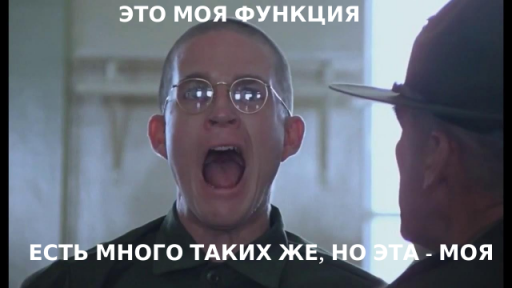

In [94]:
def func():
    print('This is my funtion!')    
    display(Image(filename='Python02-basics2_extra/func.png'))
    
func()

* Параметры могут быть позиционными и именованными
* Именованные должны всегда идти после позиционных
* Именованные при вызове можно помещать в любом порядке за позиционными
* Именованные подразумевают задание значений по умолчанию

In [63]:
def funcpar(x, y, z=1, u=2):
    print('x={} y={} z={} w={}'.format(x,y,z,u))
    
funcpar('q', 'w') # Использование заданных по умолчанию значений
funcpar('q', 'w', 6, 7) # Можно задавать именованные параметры как позиционные
funcpar('q', 'w', u=111, z=222) # Можно менять местами именованные параметры

x=q y=w z=1 w=2
x=q y=w z=6 w=7
x=q y=w z=222 w=111


## Возвращаемые значения
* Возвращаемое значение определяется служебным словом return
* Если return отсутствует, либо вызывается без аргументов, то возвращается значение None
* При возвращении нескольких значений эти значения заключаются в кортеж



In [64]:
def f1():
    print('f1')
    
def f2():
    print('f2')
    return

def f3():
    print('f3')
    return 1, 2, 3

r1 = f1()
r2 = f2()
r3 = f3()
print('r1={} r2={} r3={}'.format(r1, r2, r3))

f1
f2
f3
r1=None r2=None r3=(1, 2, 3)


## Передача по ссылке

* Значения в функцию передаются по ссылке, но сами ссылки передаются по значению, поэтому в функции нельзя заставить ссылку из точки вызова ссылаться на другой объект:
    * Значения сложных типов (список, словарь, объект пользовательского класса) можно изменить, не меняя ссылки => можем их менять изнутри функции
    * Простые типы (число, строка, кортеж) нельзя изменить, не меняя ссылку на объект => не получится изменить изнутри функции


In [65]:
def fsimple(x):
    print('Func that does x += 1')
    x += 1
    
def fcomplex(x):
    print('Func that does x[0] += 1')
    x[0] += 1
    
# Они обе ничего не возвращают!

In [66]:
x1 = 100
x2 = [100, 200]

fsimple(x1)
fcomplex(x2)

print('x1={} x2={}'.format(x1, x2))

Func that does x += 1
Func that does x[0] += 1
x1=100 x2=[101, 200]


## Ссылки на функции
* Имя функции является ссылкой на нее

In [67]:
def myprint(x):
    print('++{}++'.format(x))
    
lis = [print, myprint] # Определяем список ссылок на функции
lis[0](111) # Вызываем их с аргументами
lis[1](222)

111
++222++


## Лямбда-функция 
Это простая функция в одно выражение

27


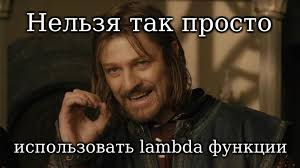

In [68]:
myf = lambda x : x*x*x # Определение лямбда-функции

print(myf(3)) # Ее вызов
Image(filename='Python02-basics2_extra/lambda.jpeg') 

## Передаваемые аргументы
В функцию можно передавать не только заранее продуманное число переменных, но и, вообще говоря, любое число любых переменных. Делается это с помощью с помощью `*` и `**` (`*`args и `**`kwargs, соответственно). 

kw - keyword (речь о словарях)

Проще всего понять происходящее на примере.

In [69]:
# Зададим функцию сложения трёх переменных
def adder(x,y,z): 
    print("sum:",x+y+z)

adder(10,12,13)

sum: 35


In [70]:
# Передадим в неё больше переменных

adder(5,10,15,20,25)

TypeError: adder() takes 3 positional arguments but 5 were given

А что делать если мы заранее количество переменных не знаем? сколько пришло - столько и сложить. Обычно в таких случаях люди пишут какой-то цикл, в питоне это можно решить, сделав функцию не сложением трёх переменных, а сложением всех пришедших переменных

In [71]:
def adder(*num):
    sum = 0
    
    for n in num:
        sum = sum + n
    print("sum:",sum)

In [72]:
# Проверим на разном числе входных данных
adder(3,5)
adder(4,5,6,7)
adder(1,2,3,5,6)

sum: 8
sum: 22
sum: 17


`**`kwargs делает то же самое с данными типа "словарь"

In [73]:
def intro(**data):
    for key, value in data.items():
        print("{} is {}".format(key,value))

In [74]:
intro(Firstname="Sita", Lastname="Sharma", Age=22, Phone=1234567890)

Firstname is Sita
Lastname is Sharma
Age is 22
Phone is 1234567890


In [75]:
intro(Firstname="John", Lastname="Wood", Email="johnwood@nomail.com", Country="Wakanda", Age=25, Phone=9876543210)

Firstname is John
Lastname is Wood
Email is johnwood@nomail.com
Country is Wakanda
Age is 25
Phone is 9876543210


In [76]:
# Когда имеем дело одновременно с обязательными входными данными,
# а так же неизвестными обычными и словарными, то делать надо так:

def diff_param_func(x, *y, **z):
    print('Predefined:', x)
    print('Non-predefined:', y)
    print('Dictionary:')   
    for key, value in z.items():
        print("{} is {}".format(key,value))

In [77]:
diff_param_func(10, 55, 66, 77, name='John', age=30)

Predefined: 10
Non-predefined: (55, 66, 77)
Dictionary:
name is John
age is 30


# Импорт модулей (пакетов)

Модуль (библиотека) в Python – это просто файл с расширением ‘.py’, в котором определены некоторые функции и / или классы.

Есть два способа использования модулей:

* Загрузка в текущее пространство имен
* Загрузка в новое именованное пространство имен

Содержимое уже загруженного модуля можно посмотреть с помощью команды dir.


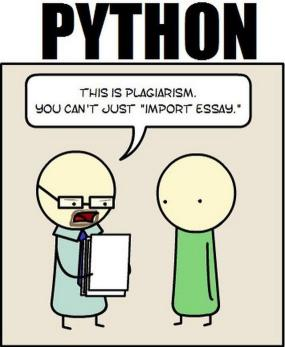

In [78]:
# Попробуем оба способа
### Соответствующие файлы лежат в папке с материалами лекции 
Image(filename='Python02-basics2_extra/import.jpg') 

In [79]:
# Загружаем все из mypackage в пространство имен mypackage
import mypackage 

In [80]:
# Загружаем все из mypackage2 в текущее пространство имен
from mypackage2 import * 

In [81]:
dir(mypackage)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'myfunc1',
 'myfunc2']

In [82]:
!cat mypackage.py

def myfunc1():
    print('My func 1')
    
def myfunc2(x, y=None):
    if y is not None:
        print(x, y)
    else:
        print(x)
    return


In [83]:
!cat mypackage2.py

def mynewfunc1():
    print('My new func 1')

def mynewfunc2(x, y=None):
    if y is not None:
        print(x, y)
    else:
        print(x)
    return


In [84]:
mypackage.myfunc1() # Обращение через именованное пространство имен
mynewfunc1() # Обращение через глобальное пространство имен

My func 1
My new func 1


Можно из модуля загрузить одну или несколько функций, не загружая остальные.

In [85]:
from mypackage import myfunc1 # Загружаем только функцию myfunc1
myfunc1()

My func 1


Можно при загрузке поменять название модуля или функций

In [86]:
import mypackage as yourpackage # Переименовываем название модуля
from mypackage import myfunc1 as yourfunc1 # Переименовываем название функции

yourpackage.myfunc1()
yourfunc1()

My func 1
My func 1


Если пользовательский модуль (пакет) лежит в другом каталоге (например, ./path1/path2/mymodule.py), то существуют два способа загрузить этот модуль:

* С помощью относительного импорта
* С помощью добавления адреса каталога в список просматриваемых Python путей


In [87]:
!cat tst/folder/deeppackage.py
from tst.folder import deeppackage as deep1 # относительный импорт
deep1.myfunc1()

def myfunc1():
    print('My func 1')

def myfunc2(x, y=None):
    if y is not None:
        print(x, y)
    else:
        print(x)
    return
My func 1


In [88]:
import sys
sys.path.insert(0, "tst/folder") # добавление пути к модулю в sys.path
import deeppackage as deep2
deep2.myfunc1()

My func 1


Загрузка стандартных библиотек (numpy, math и пр.), которые были предустановлены с Python либо установлены позднее с помощью pip, conda или ещё как-то, осуществляется точно так же с использованием конструкции import

In [89]:
import math
print(math.sqrt(25))

5.0


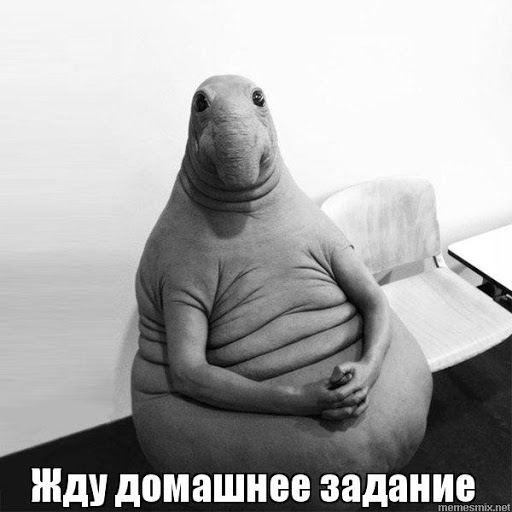

In [90]:
Image(filename='Python02-basics2_extra/hometask.jpg') 

Предлагаю всем кто внимательно прослушал сегодняшнюю лекцюю мини-задание на закрепление материала и на небольшой **бонусный балл**:
написать функцию для 4 основных арифметических операций: сложение, вычитание, умножение, деление, для сколько угодно переменных, сложить это в отдельный файл и сам файл (и ноутбук с описанным импортом и примерами) прислать нам на почту: mlcoursemm@gmail.com с темой *Python02-basics2*, не забыв указать своё имя-фамилию

примеры для валидации:

a + b + c + d = arithmetics['addition'](a, b, c, d)

a - b - c - d = arithmetics['subtraction'](a, b, c, d)

a * b * c * d = arithmetics['multiplication'](a, b, c, d)

a / b / c / d = arithmetics['division'](a, b, c, d)

P.S. **подчеркиваю - это задание не обязательное (но поощряемое)**